In [1]:
import pandas as pd
import numpy as np
import requests
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import MultipleLocator
import seaborn as sns
import ipywidgets as widgets
from ipywidgets import interact, interact_manual
from IPython.display import display

# Function Definition

In [2]:
def get_json(category, year, month):
    getURL = URL + category + '/' + year + '/' + str(int(month)) + json_suffix
    #print(getURL)
    response = requests.get(getURL)
    return json.loads(response.text)

In [3]:
def transform_to_json(df):
    json = df.to_json(orient = 'records')
    return json

In [4]:
def upload_data(url, index, year, month, date, data):
    try:
        database_URL = url + index + '/' + str(year) + '/' + str(month) + '/' + date  + json_suffix
        response = requests.put(database_URL, data)
    except:
        print("Upload Failed")

In [5]:
# Load Firebase data To DataFrame
def load_from_firebase(dataset):
    all_df = list()
    for year in dataset:
        for month in dataset[year]:
            if month != None:
                for day in month:
                    #date_list.append(day)
                    #create dataframe for every day
                    all_day_data = pd.DataFrame.from_dict(month[day])
                    all_df.append(all_day_data)
    all_dataframe = pd.concat(all_df)
    all_dataframe = all_dataframe.reset_index(drop=True)
    return all_dataframe

# Overview Analysis

## Data Preprocessing

### Load data from Firebase

In [6]:
#crime_data_response = requests.get("https://dsci551-final-project-73dad-default-rtdb.firebaseio.com/crime.json")
#crime_data_json = json.loads(crime_data_response.text)
#crime_data = load_from_firebase(crime_data_json)

### Load data from localhost

In [7]:
# 2020-01-01~2021-08-16
crime_data = pd.read_csv("crime_data_modified.csv")
covid_data = pd.read_csv("covid_modified.csv")

### Transform Time format and Rename column name 

In [8]:
# CRIME DATA
crime_data['date'] = pd.to_datetime(crime_data[['month', 'day', 'year']])
# create "weekday" column
crime_data['weekday'] = crime_data['date'].dt.dayofweek

In [9]:
# COVID DATA
covid_data = covid_data.dropna()
covid_data['date'] = pd.to_datetime(covid_data['date'])
covid_data['weekday'] = covid_data['date'].dt.dayofweek

## Analysis

### Time

### Month: Crimes most often occur in Jan/May~Aug (students are on vacation)

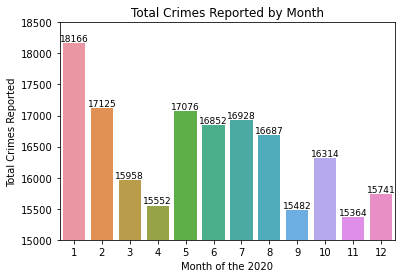

In [10]:
crime_data_2020 = crime_data[crime_data['year']==2020]
crime_data_2021 = crime_data[crime_data['year']==2021]

fig, ax = plt.subplots()

sns.barplot(x=crime_data_2020['month'].value_counts().index, y=crime_data_2020['month'].value_counts())
ax.set_title("Total Crimes Reported by Month")
#ax.set_xticklabels(["1", "2", "3", "4", "5", "6","7", "8", "9", "10", "11", "12"], fontsize=9)
ax.set_xlabel("Month of the 2020")
ax.set_ylabel("Total Crimes Reported")
plt.ylim([15000, 18500])
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height())), 
            fontsize=9, color='black', ha='center', va='bottom')
    
#sns.despine()

### Weekday: Crimes most often occur on Fridays

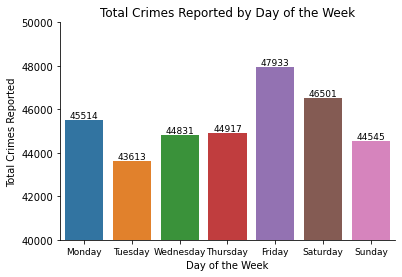

In [11]:
fig, ax = plt.subplots()
# Plotting crimes reported by day
sns.barplot(x=crime_data['weekday'].value_counts().index, y=crime_data['weekday'].value_counts())
# Axes
ax.set_title("Total Crimes Reported by Day of the Week")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Crimes Reported")
plt.ylim([40000, 50000])
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height())), fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

### Hour: Crimes most often occur at 12:00 and evening

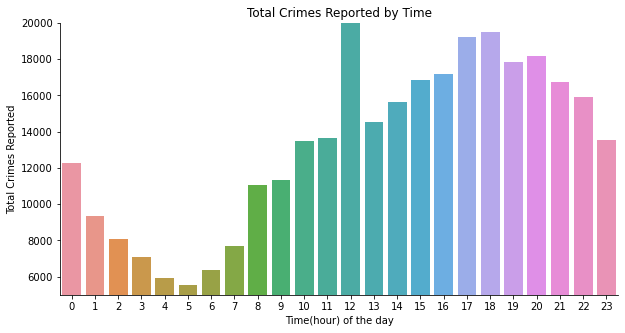

In [12]:
# convert crime_time into "hour"(0-24)
crime_data['crime_time_byhour'] = pd.Series.to_frame(crime_data['crime_time']//100)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=crime_data['crime_time_byhour'].value_counts().index, y=crime_data['crime_time_byhour'].value_counts())
ax.set_title("Total Crimes Reported by Time")
ax.set_xlabel("Time(hour) of the day")
ax.set_ylabel("Total Crimes Reported")
plt.ylim([5000, 20000])
sns.despine()

### Area: 77th street is the most dangerous place

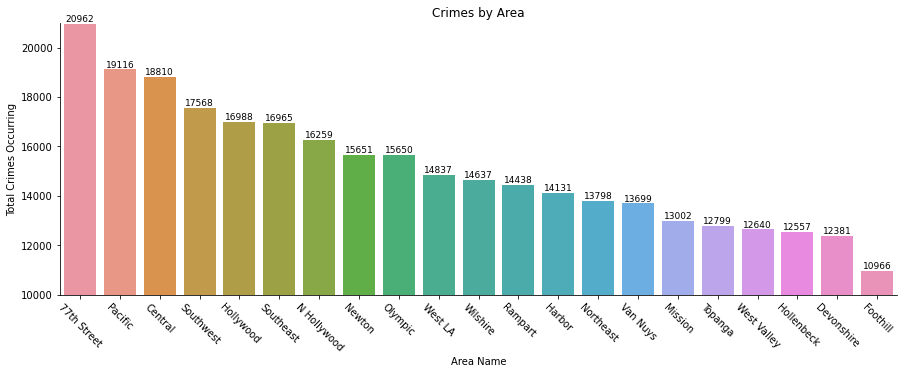

In [13]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x = crime_data["area_name"].value_counts().index, y = crime_data["area_name"].value_counts(), ax=ax)
ax.set_title("Crimes by Area")
ax.set_xticklabels(ax.get_xticklabels(), rotation=-45)
ax.set_xlabel("Area Name")
ax.set_ylabel("Total Crimes Occurring")
plt.ylim([10000, 21000])
# Adding Values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height())), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

## Victim Analysis

### Age: People between 20 and 40 were most affected to crimes

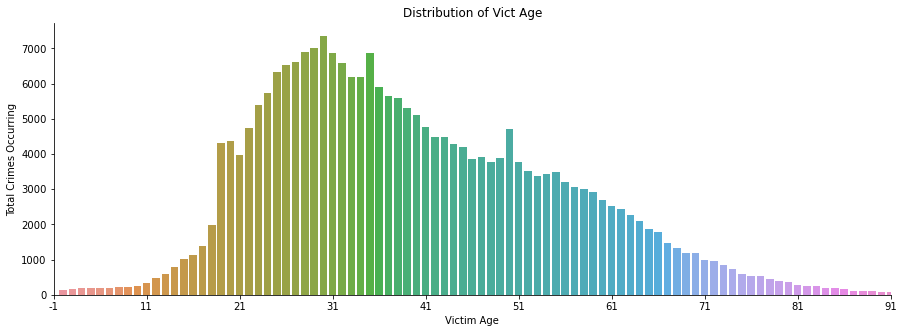

In [20]:
fig, ax = plt.subplots(figsize=(15, 5))

crime_data.drop(crime_data[crime_data["vict_age"]==0].index, inplace=True)
crime_data.reset_index(drop=True, inplace=True)

sns.barplot(x = crime_data["vict_age"].value_counts().index, y = crime_data["vict_age"].value_counts())
ax.set_title("Distribution of Vict Age")
ax.set_xlabel("Victim Age")
ax.set_ylabel("Total Crimes Occurring")
x_major_locator = MultipleLocator(10)
ax = plt.gca()
ax.xaxis.set_major_locator(x_major_locator)
plt.xlim([0, 90])

sns.despine()

### Descent: Hispanic/Latin/Mexican were most affected to crimes

#### A - Other Asian B - Black C - Chinese D - Cambodian F - Filipino G - Guamanian H - Hispanic/Latin/Mexican I - American Indian/Alaskan Native J - Japanese K - Korean L - Laotian O - Other P - Pacific Islander S - Samoan U - Hawaiian V - Vietnamese W - White X - Unknown Z - Asian Indian

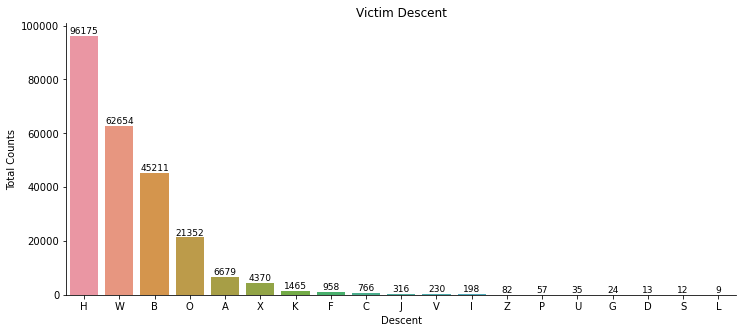

In [19]:
fig, ax = plt.subplots(figsize=(12, 5))
crime_data.drop(crime_data[crime_data["vict_age"]==0].index, inplace=True)
crime_data.reset_index(drop=True, inplace=True)

sns.barplot(x = crime_data["vict_des"].value_counts().index, y = crime_data["vict_des"].value_counts())
ax.set_title("Victim Descent")
ax.set_xticklabels(ax.get_xticklabels())
ax.set_xlabel("Descent")
ax.set_ylabel("Total Counts")
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height())), 
            fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

### Type: Simple assault is the most common attack

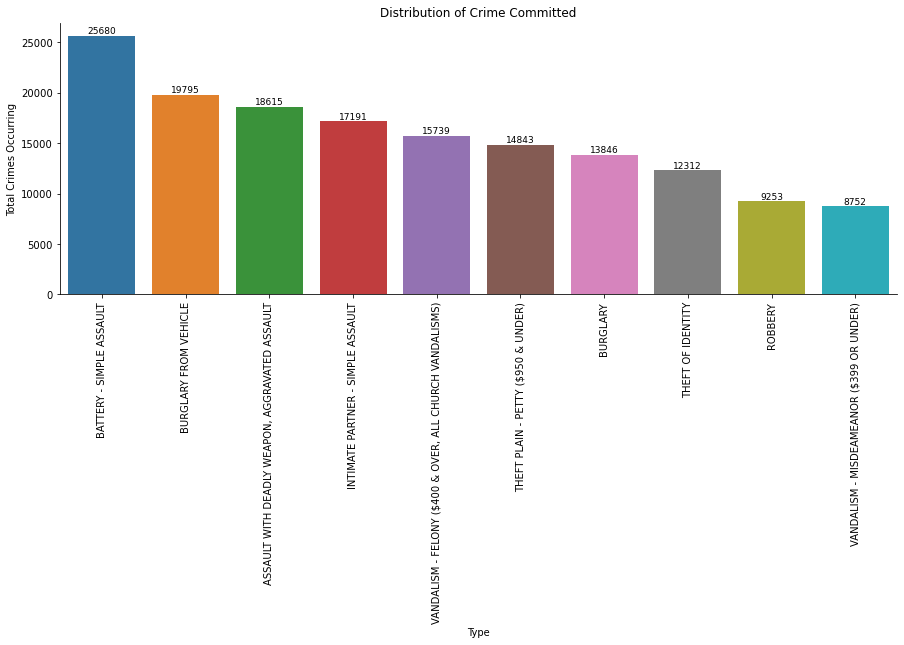

In [16]:
fig, ax = plt.subplots(figsize=(15, 5))

sns.barplot(x = crime_data["Crm Cd Desc"].value_counts().index[:10], y = crime_data["Crm Cd Desc"].value_counts()[:10],)
ax.set_title("Distribution of Crime Committed")
ax.set_xlabel("Type")
ax.set_ylabel("Total Crimes Occurring")
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height())), 
            fontsize=9, ha='center', va='bottom')
#plt.xticks(rotation='vertical')
sns.despine()


## Covid Analysis

### People are less likely to go tested on weekends

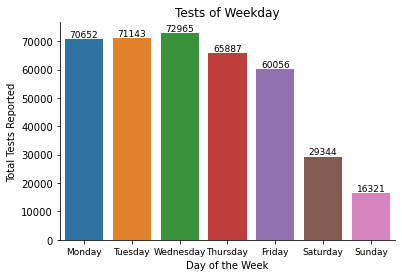

In [17]:
fig, ax = plt.subplots()
# Plotting crimes reported by day
sns.barplot(x=covid_data['weekday'].value_counts().index.sort_values(ascending=True), y=covid_data[['weekday', 'tests']].groupby('weekday').mean().squeeze())
# Axes
ax.set_title("Tests of Weekday")
ax.set_xticklabels(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"], fontsize=9)
ax.set_xlabel("Day of the Week")
ax.set_ylabel("Total Tests Reported")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%d' % round(int(p.get_height())), fontsize=9, color='black', ha='center', va='bottom')
sns.despine()

### Epidemic severity: The beginning of 2020 and the end of the 2020 are the most severe times of the epidemic

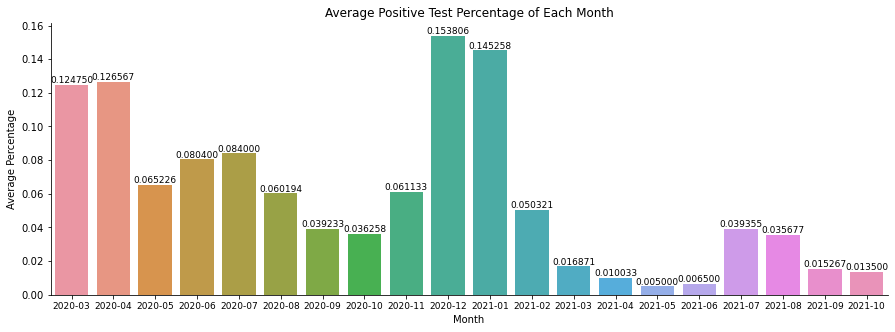

In [18]:
covid_data['year_and_month'] = covid_data.year.astype(str) + '-' + covid_data.month.astype(str)

#covid_data[['year', 'month', 'percent_positive_avg_tests']].groupby(['year', 'month']).mean()
fig, ax = plt.subplots(figsize=(15, 5))
# Plotting crimes reported by day
sns.barplot(x=covid_data['year_and_month'].value_counts().index.sort_values(ascending=True), y=covid_data[['year', 'month', 'percent_positive_avg_tests']].groupby(['year', 'month']).mean().squeeze())
# Axes
ax.set_title("Average Positive Test Percentage of Each Month")
ax.set_xticklabels(["2020-03", "2020-04", "2020-05", "2020-06", "2020-07", "2020-08", "2020-09", "2020-10", "2020-11", "2020-12", "2021-01", "2021-02", "2021-03", "2021-04", "2021-05", "2021-06", "2021-07", "2021-08", "2021-09", "2021-10"], fontsize=9)
ax.set_xlabel("Month")
ax.set_ylabel("Average Percentage")
# Adding values
for p in ax.patches:
    ax.text(p.get_x() + p.get_width()/2., p.get_height(), '%f'% p.get_height() , fontsize=9, color='black', ha='center', va='bottom')
sns.despine()